In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1 = pd.ExcelFile('/Users/harishprabhala/Downloads/flatiron_qs_orders_admins_july_16.xlsx')

In [176]:
orders = df1.parse('Orders')
admins = df1.parse('Admins')
dems = df1.parse('Demographics')
patients = df1.parse('Patients')
practice = df1.parse('Practices')

In [8]:
orders.head()

,patient_id,external_patient_id,order_id,order_date
0,h9993d,70,w187808812917e,13-Dec-2012
1,h9993d,70,r90118525421e,7-Aug-2015
2,h9993d,70,h84358125584w,30-Sep-2015
3,h9993d,70,o81913333209g,8-Jan-2014
4,h9993d,70,e76139113344l,11-Oct-2012


In [9]:
admins.head()

,patient_id,external_patient_id,order_id,administered_date,drug_name
0,h9993d,70,w187808812917e,13-Dec-2012,bevacizumab
1,h9993d,70,r90118525421e,7-Aug-2015,nivolumab
2,h9993d,70,h84358125584w,30-Sep-2015,bevacizumab
3,h9993d,70,o81913333209g,8-Jan-2014,nivolumab
4,h9993d,70,e76139113344l,11-Oct-2012,erlotinib hcl


## 1.	When presented with a new dataset or database, what steps do you generally take to evaluate it prior to working with it?  
When I am presented with a new dataset or database, prior to conducting the analysis, I generally look for/evaluate the following:

- a.	Source of the data – to make sure the source is reliable, valid and accurate
- b.	Size of the dataset – to evaluate which analytical tool to use that is optimal/efficient according to the size of the data.
- c.	Understand the data – to make sure that I understand the tables and columns so that there is no misinterpretation of the data.
- d.	Data dictionary/documentation - request for a data dictionary if necessary/applicable.


## 2. Based on the information provided above and the attached dataset, what 3 questions would you like to understand prior to conducting any analysis of the data?  

I would like to understand the following three questions before conducting my analysis:

- Demographic characteristics of the cancer patients
- Drug/Medication usage
- Patient volume per practice.

### Demographic Characteristics

In [12]:
dems.head()

,patient_id,gender,age,race
0,h9993d,female,69.0,NON_WHITE
1,w9986a,female,46.0,WHITE
2,n9925d,female,84.0,NON_WHITE
3,a9913g,female,87.0,NON_WHITE
4,t9815h,female,97.0,WHITE


In [17]:
dems['gender'].value_counts()

female     50
male       43
unknown     6
Name: gender, dtype: int64

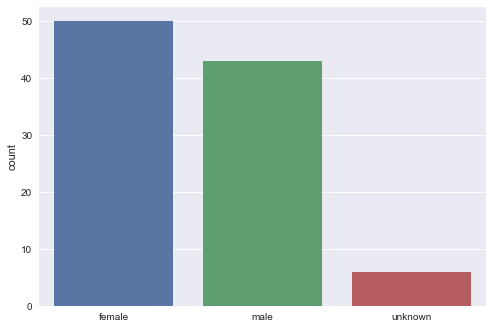

In [43]:
sns.barplot(x=dems.gender.value_counts().index, y=dems.gender.value_counts())
plt.ylabel('count')

In [26]:
dems['race'].value_counts()

WHITE        57
NON_WHITE    42
Name: race, dtype: int64

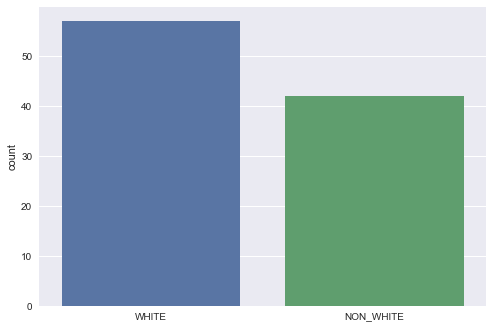

In [44]:
sns.barplot(x=dems.race.value_counts().index, y=dems.race.value_counts())
plt.ylabel('count')

In [34]:
dems['age'].describe()

count     99.000000
mean      68.212121
std       24.315223
min       10.000000
25%       50.500000
50%       73.000000
75%       86.000000
max      118.000000
Name: age, dtype: float64

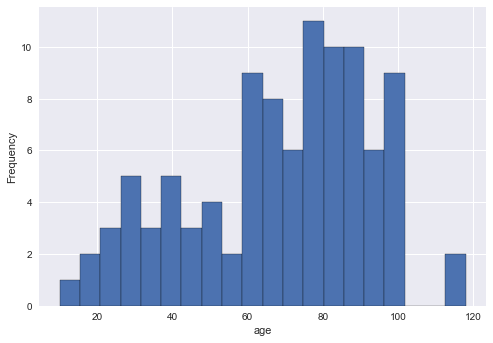

In [39]:
dems['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('age')

## Drug Usage

In [40]:
admins.head()

,patient_id,external_patient_id,order_id,administered_date,drug_name
0,h9993d,70,w187808812917e,13-Dec-2012,bevacizumab
1,h9993d,70,r90118525421e,7-Aug-2015,nivolumab
2,h9993d,70,h84358125584w,30-Sep-2015,bevacizumab
3,h9993d,70,o81913333209g,8-Jan-2014,nivolumab
4,h9993d,70,e76139113344l,11-Oct-2012,erlotinib hcl


In [41]:
admins.drug_name.value_counts()

nivolumab        109
bevacizumab      104
erlotinib hcl     63
axitinib          28
Name: drug_name, dtype: int64

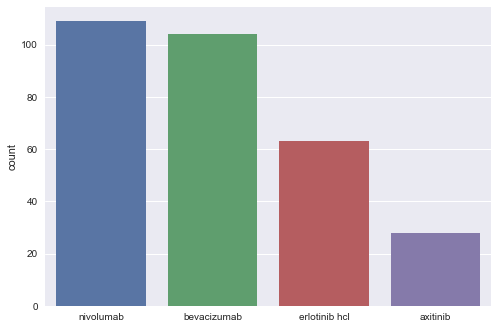

In [45]:
sns.barplot(x=admins.drug_name.value_counts().index, y=admins.drug_name.value_counts())
plt.ylabel('count')

In [47]:
d = admins[(admins.drug_name == 'nivolumab')|(admins.drug_name == 'bevacizumab')|(admins.drug_name == 'erlotinib hcl')|(admins.drug_name == 'axitinib')]
g = d.groupby([d.external_patient_id,'drug_name']).size()
g

external_patient_id  drug_name    
1                    axitinib         1
                     nivolumab        2
2                    axitinib         1
                     bevacizumab      2
                     erlotinib hcl    1
                     nivolumab        6
3                    bevacizumab      1
                     erlotinib hcl    2
4                    bevacizumab      1
                     erlotinib hcl    3
                     nivolumab        2
5                    axitinib         1
                     nivolumab        2
6                    axitinib         1
                     erlotinib hcl    2
7                    bevacizumab      1
                     nivolumab        1
8                    nivolumab        1
9                    axitinib         1
                     bevacizumab      2
                     erlotinib hcl    2
10                   nivolumab        2
11                   nivolumab        3
12                   axitinib         1
13   

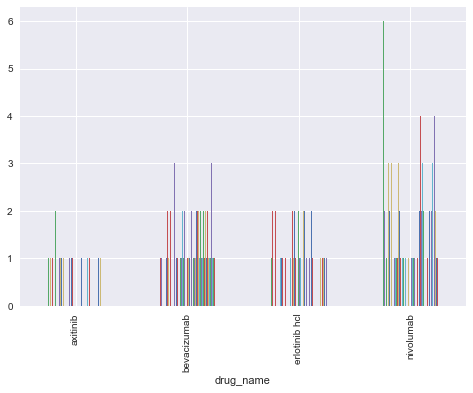

In [53]:
g.unstack(0).plot(kind ='bar', legend=None)

#### In the above graph, we can see the frequency/count of the drug dosage in the patients. Nivolumab and Bevacizumab have been administered more frequently than erlotinib hcl and axitinib

## Patient volume per practice

In [54]:
patients.head()

,patient_id,external_patient_id,external_practice_id,internal_practice_id,diagnosis_date,advanced_diagnosis_date
0,h9993d,70,QZ1,9,29-Mar-1992,NaN
1,w9986a,46,ZE4G,4,15-Feb-2012,3-Jul-2012
2,n9925d,15,FUM35,5,5-Jul-1962,18-May-2009
3,a9913g,6,DSVN67,7,16-Oct-1930,14-Sep-1970
4,a9913g,6,DSVN67,7,16-Oct-1930,14-Sep-1970


In [67]:
patients.external_practice_id.value_counts()

DSVN67    15
ZE4G      15
FZAB      14
FEI30     12
FI3040    12
KNO54     11
FUM35      8
QZ1        7
FZ3        4
WZ4        3
Name: external_practice_id, dtype: int64

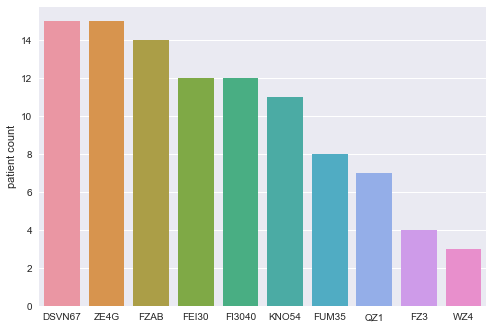

In [72]:
sns.barplot(x=patients.external_practice_id.value_counts().index, y=patients.external_practice_id.value_counts())
plt.ylabel('patient count')

#### The above graph shows the number of patients at each practice/client.

In [85]:
prac_drugs=patients.merge(admins,how='outer',left_on='patient_id',right_on='patient_id')

In [87]:
prac_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 10 columns):
patient_id                 315 non-null object
external_patient_id_x      312 non-null float64
external_practice_id       312 non-null object
internal_practice_id       312 non-null float64
diagnosis_date             305 non-null object
advanced_diagnosis_date    305 non-null object
external_patient_id_y      315 non-null int64
order_id                   315 non-null object
administered_date          315 non-null object
drug_name                  315 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 27.1+ KB


In [90]:
prac_drugs.head()

,patient_id,external_patient_id_x,external_practice_id,internal_practice_id,diagnosis_date,advanced_diagnosis_date,external_patient_id_y,order_id,administered_date,drug_name
0,h9993d,70.0,QZ1,9.0,29-Mar-1992,NaN,70,w187808812917e,13-Dec-2012,bevacizumab
1,h9993d,70.0,QZ1,9.0,29-Mar-1992,NaN,70,r90118525421e,7-Aug-2015,nivolumab
2,h9993d,70.0,QZ1,9.0,29-Mar-1992,NaN,70,h84358125584w,30-Sep-2015,bevacizumab
3,h9993d,70.0,QZ1,9.0,29-Mar-1992,NaN,70,o81913333209g,8-Jan-2014,nivolumab
4,h9993d,70.0,QZ1,9.0,29-Mar-1992,NaN,70,e76139113344l,11-Oct-2012,erlotinib hcl


In [99]:
prac_drugs.groupby(['external_practice_id','drug_name']).size()

external_practice_id  drug_name    
DSVN67                axitinib          6
                      bevacizumab      11
                      erlotinib hcl    13
                      nivolumab        13
FEI30                 axitinib          2
                      bevacizumab      12
                      erlotinib hcl     6
                      nivolumab        11
FI3040                axitinib          5
                      bevacizumab      22
                      erlotinib hcl     9
                      nivolumab        10
FUM35                 bevacizumab       3
                      erlotinib hcl     6
                      nivolumab         8
FZ3                   axitinib          3
                      bevacizumab       3
                      erlotinib hcl     3
                      nivolumab         1
FZAB                  axitinib          3
                      bevacizumab      18
                      erlotinib hcl     8
                      nivolumab        2

In [103]:
p = prac_drugs.groupby(['external_practice_id','drug_name']).size()

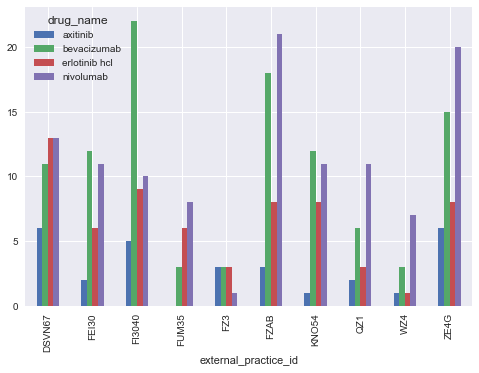

In [105]:
p.unstack(1).plot(kind ='bar')

#### The above graph shows the frequency of each administered drug at each practice/client.

## 3. How would you prep the dataset provided for analysis? Please list steps taken and provide code used to prep the tables for analysis.

The dataset given for this exercise is small and fairly neat w/o any missing data. So, I do not find much need to prep the data in this case. However, if the dataset is big with large number of columns and rows, then I would take the following steps:

- Evaluate the important columns that are useful for the analysis and keep them while removing the rest of the columns that are not useful.
- If the size of the missing data is large, then thoroughly evaluate the columns and rows to conduct data imputation.
- If there are any outliers that are heavily skewing the data, then evaluate whether or not it is important/prudent to remove the outliers.
- Conduct central tendency tests and evaulate the variable spreads.
- If the analysis requires predictive modeling/machine learning, then conduct feature engineering of the dependent and independent variables to build and train different models.

Since, this analysis does not require to conduct any statistical testing or predictive modeling, the data prep steps are pretty limited in this case and I will be using the data as it is.

## Using the datasets you have prepped, please answer the following questions and provide all code/output used. Be sure to include and explain any assumptions made when answering each question.

### 1. What is the average time elapsed between a patient’s initial diagnosis date and a patient’s first treatment? Does this time vary by gender?

- The assumption here is that the patient's first treatment date is the date when the first drug was administered. For this analysis, I have taken the minimun of each patient's administered date. Thus, it gives us the earliest date when the patient has taken a drug.

In [117]:
admins.head()

,patient_id,external_patient_id,order_id,administered_date,drug_name
0,h9993d,70,w187808812917e,13-Dec-2012,bevacizumab
1,h9993d,70,r90118525421e,7-Aug-2015,nivolumab
2,h9993d,70,h84358125584w,30-Sep-2015,bevacizumab
3,h9993d,70,o81913333209g,8-Jan-2014,nivolumab
4,h9993d,70,e76139113344l,11-Oct-2012,erlotinib hcl


In [155]:
admins_copy = admins[['patient_id','administered_date']]

In [166]:
admins_copy['administered_date'] = pd.DatetimeIndex(admins_copy['administered_date'])

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [167]:
admins_copy.head()

,patient_id,administered_date
0,h9993d,2012-12-13
1,h9993d,2015-08-07
2,h9993d,2015-09-30
3,h9993d,2014-01-08
4,h9993d,2012-10-11


In [169]:
data = pd.DataFrame(admins_copy.groupby(['patient_id'],sort=False)['administered_date'].min())

In [172]:
data.head(10)

,administered_date
patient_id,
h9993d,2012-10-11
w9986a,2011-05-25
n9925d,2013-07-11
a9913g,2013-11-12
t9815h,2014-06-04
d9750n,2013-01-24
t9509b,2012-10-02
s9417f,2013-05-02
b9305v,2014-01-14


In [242]:
diag_treat_diff=patients.merge(data,how='outer',left_on='patient_id',right_index=True)

In [246]:
diag_treat_diff.head()

,patient_id,external_patient_id,external_practice_id,internal_practice_id,diagnosis_date,advanced_diagnosis_date,administered_date
0,h9993d,70.0,QZ1,9.0,29-Mar-1992,NaN,2012-10-11
1,w9986a,46.0,ZE4G,4.0,15-Feb-2012,3-Jul-2012,2011-05-25
2,n9925d,15.0,FUM35,5.0,5-Jul-1962,18-May-2009,2013-07-11
3,a9913g,6.0,DSVN67,7.0,16-Oct-1930,14-Sep-1970,2013-11-12
4,a9913g,6.0,DSVN67,7.0,16-Oct-1930,14-Sep-1970,2013-11-12


In [247]:
diag_treat_diff['diagnosis_date'] = pd.DatetimeIndex(diag_treat_diff['diagnosis_date'])

In [248]:
diag_treat_diff['datediff'] = (diag_treat_diff['administered_date'] - diag_treat_diff['diagnosis_date']).dt.days

In [249]:
# This table gives us the number of days elapsed (datediff) between the diagnosis date 
# and the first drug administered date 
diag_treat_diff.head() 

,patient_id,external_patient_id,external_practice_id,internal_practice_id,diagnosis_date,advanced_diagnosis_date,administered_date,datediff
0,h9993d,70.0,QZ1,9.0,1992-03-29,NaN,2012-10-11,7501.0
1,w9986a,46.0,ZE4G,4.0,2012-02-15,3-Jul-2012,2011-05-25,-266.0
2,n9925d,15.0,FUM35,5.0,1962-07-05,18-May-2009,2013-07-11,18634.0
3,a9913g,6.0,DSVN67,7.0,1930-10-16,14-Sep-1970,2013-11-12,30343.0
4,a9913g,6.0,DSVN67,7.0,1930-10-16,14-Sep-1970,2013-11-12,30343.0


#### In the above table, there are some outliers where the administered date is earlier than the initial diagnosis date. These may be mistakenly entered so we omit these rows for our analysis.

In [250]:
diag_treat_diff[(diag_treat_diff.datediff>0)].mean()

external_patient_id        51.239583
internal_practice_id        5.447917
datediff                14622.281250
dtype: float64

#### The average days elapsed between initial diagnosis and first treatment is 14622 days or 40 years

In [251]:
diag_treat_diff_gender=diag_treat_diff.merge(dems,how='outer',left_on='patient_id',right_on='patient_id')

In [252]:
diag_treat_diff_gender.head()

,patient_id,external_patient_id,external_practice_id,internal_practice_id,diagnosis_date,advanced_diagnosis_date,administered_date,datediff,gender,age,race
0,h9993d,70.0,QZ1,9.0,1992-03-29,NaN,2012-10-11,7501.0,female,69.0,NON_WHITE
1,w9986a,46.0,ZE4G,4.0,2012-02-15,3-Jul-2012,2011-05-25,-266.0,female,46.0,WHITE
2,n9925d,15.0,FUM35,5.0,1962-07-05,18-May-2009,2013-07-11,18634.0,female,84.0,NON_WHITE
3,a9913g,6.0,DSVN67,7.0,1930-10-16,14-Sep-1970,2013-11-12,30343.0,female,87.0,NON_WHITE
4,a9913g,6.0,DSVN67,7.0,1930-10-16,14-Sep-1970,2013-11-12,30343.0,female,87.0,NON_WHITE


In [253]:
diag_treat_diff_gender[(diag_treat_diff_gender.datediff>0)&(diag_treat_diff_gender.gender == 'female')].mean()

external_patient_id        53.250000
internal_practice_id        5.875000
datediff                16047.479167
age                        70.958333
dtype: float64

#### For females, the average days elapsed between initial diagnosis and first treatment is 16047 days or 43.9 years

In [254]:
diag_treat_diff_gender[(diag_treat_diff_gender.datediff>0)&(diag_treat_diff_gender.gender == 'male')].mean()

external_patient_id        48.333333
internal_practice_id        5.000000
datediff                13017.285714
age                        62.023810
dtype: float64

#### For males, the average days elapsed between initial diagnosis and first treatment is 13017 days or 35.6 years

## 2. How many patients are on nivolumab from 2012 - 2016?

In [257]:
admins.head()

,patient_id,external_patient_id,order_id,administered_date,drug_name
0,h9993d,70,w187808812917e,13-Dec-2012,bevacizumab
1,h9993d,70,r90118525421e,7-Aug-2015,nivolumab
2,h9993d,70,h84358125584w,30-Sep-2015,bevacizumab
3,h9993d,70,o81913333209g,8-Jan-2014,nivolumab
4,h9993d,70,e76139113344l,11-Oct-2012,erlotinib hcl


In [258]:
admins['administered_date'] = pd.DatetimeIndex(admins['administered_date'] )

In [278]:
len(admins[(admins.administered_date >='2012-01-01')&(admins.administered_date <'2016-01-01')
      & (admins.drug_name == 'nivolumab')])

100

#### Between 2012 and 2016, there were 100 patients on nivolumab

## 3. Using the following risk stratification rules, please summarize the number of high, medium, and low risk patients.
- HighRisk = Female; any­age; NON_WHITE OR Male; >= 70; NON_WHITE 
- MediumRisk = Female; >=75, WHITE OR Male; <70; NON_WHITE
- LowRisk = Female; < 75, WHITE OR Male; any­age; WHITE

In [279]:
dems.head()

,patient_id,gender,age,race
0,h9993d,female,69.0,NON_WHITE
1,w9986a,female,46.0,WHITE
2,n9925d,female,84.0,NON_WHITE
3,a9913g,female,87.0,NON_WHITE
4,t9815h,female,97.0,WHITE


In [295]:
high_risk = (len(dems[(dems.gender=='female')&(dems.race=='NON_WHITE')]))+(len(dems[(dems.gender=='male')&(dems.race=='NON_WHITE')&(dems.age>=70)]))
print('The number of high risk patients are %d' %high_risk) 

The number of high risk patients are 30


In [297]:
med_risk = (len(dems[(dems.gender=='female')&(dems.age>=75)&(dems.race=='WHITE')]))+(len(dems[(dems.gender=='male')&(dems.race=='NON_WHITE')&(dems.age<70)]))
print('The number of medium risk patients are %d' %med_risk) 

The number of medium risk patients are 24


In [298]:
low_risk = (len(dems[(dems.gender=='female')&(dems.age<75)&(dems.race=='WHITE')]))+(len(dems[(dems.gender=='male')&(dems.race=='WHITE')]))
print('The number of low risk patients are %d' %low_risk) 

The number of low risk patients are 39


## 4. Please create a visualization that could be used to help a medical researcher? understand how drug prevalence has changed over time.

In [299]:
admins.head()

,patient_id,external_patient_id,order_id,administered_date,drug_name
0,h9993d,70,w187808812917e,2012-12-13,bevacizumab
1,h9993d,70,r90118525421e,2015-08-07,nivolumab
2,h9993d,70,h84358125584w,2015-09-30,bevacizumab
3,h9993d,70,o81913333209g,2014-01-08,nivolumab
4,h9993d,70,e76139113344l,2012-10-11,erlotinib hcl


In [300]:
admins_copy1 = admins[['patient_id','administered_date','drug_name']]

In [301]:
admins_copy1['admin_year'] = admins_copy1['administered_date'].dt.year

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [317]:
admins_copy1 = admins_copy1[admins_copy1.admin_year < 2018]

In [318]:
drg = admins_copy1.groupby(['admin_year','drug_name']).size()

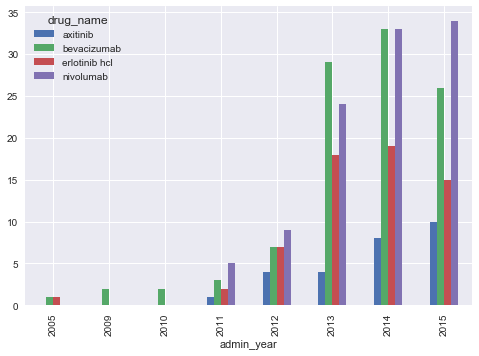

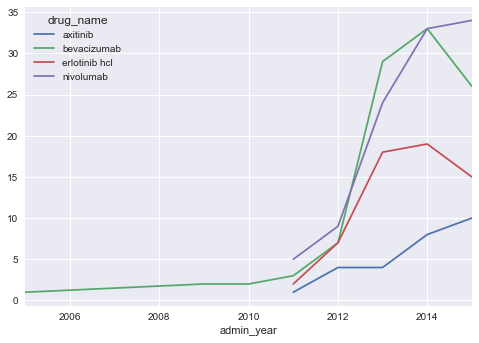

In [319]:
drg.unstack(1).plot(kind='Bar')
drg.unstack(1).plot()

#### The above two graphs represent the change of drug prevalence over time.